# Computergestützte Mathematik zur Analysis

Vorlesung vom 19.01.2023

&copy; 2023 Prof. Dr. Rüdiger W. Braun 

In [1]:
from sympy import *
init_printing()

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Farbkodierung

In [3]:
x = S('x')
y = S('y')
f = -x**4/2 - x**2*y**2 - y**4/2 + x**3 - 3*x*y**2

In [4]:
fn = lambdify((x,y), f)

In [5]:
xn = np.linspace(-2, 2, 400)
yn = np.linspace(-2, 2, 401)
X, Y = np.meshgrid(xn, yn)
Z = fn(X, Y)

In [6]:
ausdehnung = (xn[0], xn[-1], yn[0], yn[-1])

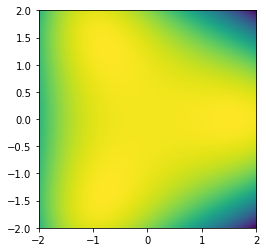

In [7]:
plt.imshow(Z, extent=ausdehnung, origin='lower');

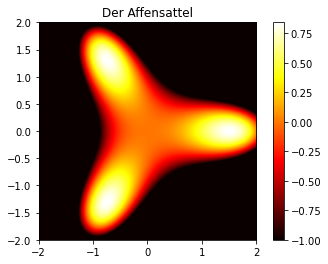

In [8]:
plt.imshow(Z, extent=ausdehnung, origin='lower', cmap=plt.cm.hot, vmin=-1)
plt.title("Der Affensattel")
plt.colorbar();

In [9]:
noether = plt.imread('noether.png')
noether.shape

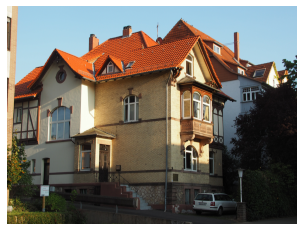

In [10]:
plt.imshow(noether, aspect="equal")
plt.axis('off');

Einfache Bildverarbeitung in Python mit https://python-pillow.org/

# Plotverschönerung

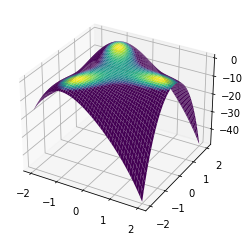

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis, vmin=-1); 

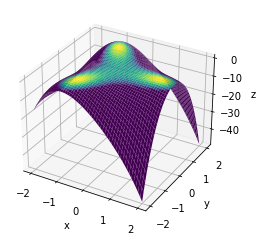

In [12]:
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
fig

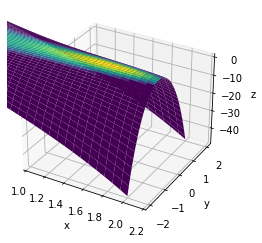

In [13]:
l, r = ax.get_xlim()
ax.set_xlim(xmin=1)
fig

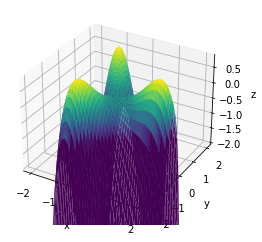

In [14]:
ax.set_xlim((l,r))
ax.set_zlim(bottom=-2)
fig

unbrauchbar

# Contourplots

Höhenlinien

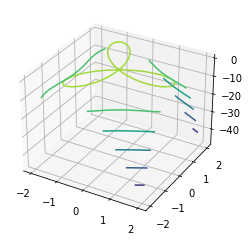

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour(X, Y, Z);

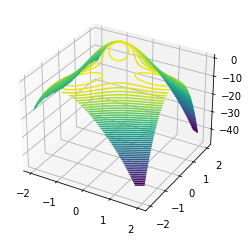

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour(X, Y, Z, levels=np.linspace(-40, 1, 50));

Oben sind zu wenige Höhenlinien

In [17]:
a = np.concatenate([np.linspace(0,1,3), np.linspace(0.1,10,4)])
a

array([ 0. ,  0.5,  1. ,  0.1,  3.4,  6.7, 10. ])

In [18]:
np.sort(a)

array([ 0. ,  0.1,  0.5,  1. ,  3.4,  6.7, 10. ])

In [22]:
gr = Matrix([f]).jacobian([x,y])
lsg = solve(gr)
werte = []
for l in lsg:
    werte.append(f.subs(l).n())
t = np.max(werte)
t

In [23]:
type(t)

sympy.core.numbers.Float

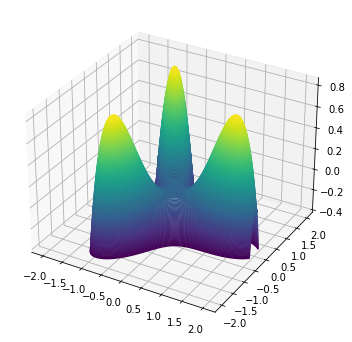

In [20]:
b = -.4
t = float(t)    # ohne dies:  TypeError
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
l1 = np.linspace(b, t, 150)
l2 = np.linspace(-.02, .02, 101)  
levels = np.sort(np.concatenate([l1, l2]))
ax.contour(X, Y, Z, levels=levels)
ax.set_zlim(bottom=b);

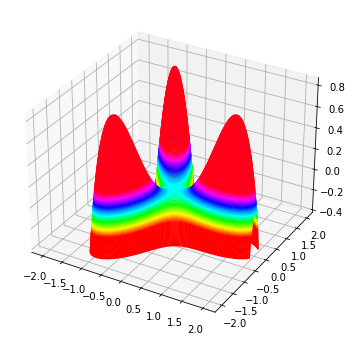

In [24]:
b = -.4
t = float(t)    # ohne dies:  TypeError
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
l1 = np.linspace(b, t, 150)
l2 = np.linspace(-.02, .02, 101)  
levels = np.sort(np.concatenate([l1, l2]))
ax.contour(X, Y, Z, levels=levels, cmap=plt.cm.hsv, vmin=-.2, vmax=.2)
ax.set_zlim(bottom=b);

Alternative: https://docs.enthought.com/mayavi/mayavi/

Alle `matplotlib`-Farbschemata: https://matplotlib.org/stable/tutorials/colors/colormaps.html

# Gewöhnliche Differentialgleichungen

In [25]:
x = S('x')
y = Function('y')

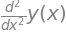

In [26]:
y(x).diff(x,2)

In [27]:
dgl = Eq(y(x), -y(x).diff(x))
dgl

In [29]:
lsg = dsolve(dgl)
lsg

In [30]:
lsg.rhs.subs(S('C1'), 28)

# Anfangswertaufgabe

löse $y' = y - x^3 + 3x -2$, $y(1)=4$

In [31]:
dgl = Eq(y(x).diff(x), y(x) - x**3 + 3*x - 2)
dgl

In [32]:
lsg = dsolve(dgl, ics={y(1): 4})   #  ics ist ein Dictionary
lsg

Probe:

In [33]:
phi = lsg.rhs
tmp = dgl.subs(y(x), phi)
tmp

In [34]:
tmp.doit()

True

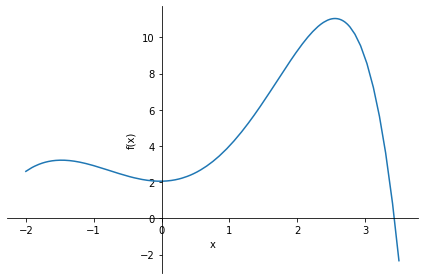

In [35]:
plot(phi, (x, -2, 3.5));

Lösungskurven für verschiedene Anfangsbedingungen

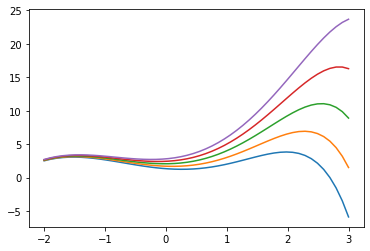

In [36]:
xn = np.linspace(-2, 3)
fig = plt.figure()
ax = fig.add_subplot(111)
for y0 in range(2,7):
    ics = {y(1): y0}
    lsg = dsolve(dgl, ics=ics)
    phi_n = lambdify(x, lsg.rhs)
    ax.plot(xn, phi_n(xn))

# Das Richtungsfeld

In [37]:
nx = 13
ny = 11 
xq = np.linspace(-2, 3, nx)
yq = np.linspace(-5, 25, ny)
X, Y = np.meshgrid(xq, yq)

In [38]:
r_n = lambdify((x,y(x)), dgl.rhs)

In [39]:
V = r_n(X, Y)

`V`  gibt in jedem Punkt $(x,y)$ die Steigung der Lösung der Dgl in diesem Punkt an

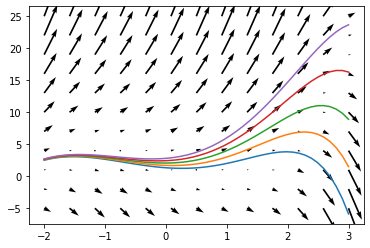

In [40]:
U = np.ones_like(X)
ax.quiver(X, Y, U, V, angles='xy')
fig
# quiver: Köcher
# X, Y: Fußpunkte der Pfeile
# U, V: Koordinaten der Pfeile, gemessen vom Fußpunkt
# angles='xy':  Koordinaten der Pfeile proportional zu den Einheiten der Achsen

In [42]:
dgl = Eq(y(x).diff(x), exp(y(x))*sin(x))
dgl

In [43]:
lsg = dsolve(dgl)
lsg

In [44]:
xn = np.linspace(-2.5*np.pi, 2.5*np.pi, 3000)
phi_n = lambdify((x, S('C1')), lsg.rhs)

<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))


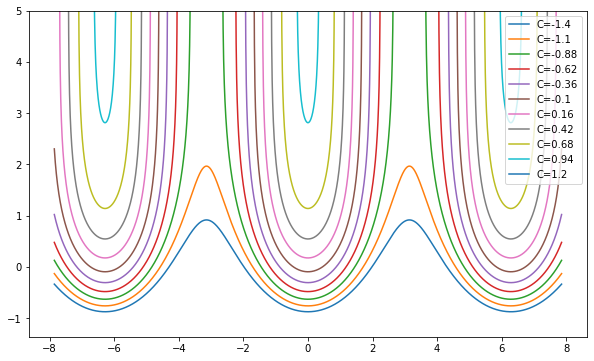

In [45]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for C in np.linspace(-1.4, 1.2, 11):
    ax.plot(xn, phi_n(xn, C), label=f"C={C:1.2}")
ax.axis(ymax=5)
plt.legend();

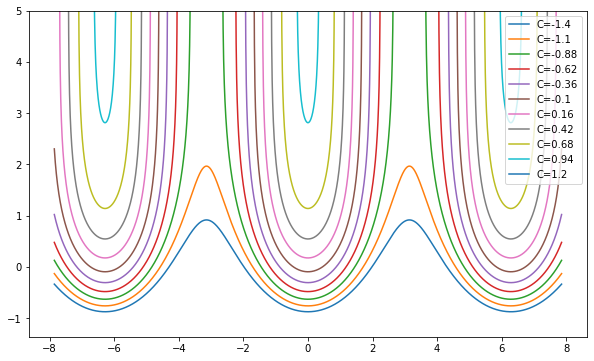

In [46]:
fig

In [47]:
xq = np.linspace(xn[0], xn[-1], nx)
yq = np.linspace(-1, 5, ny)
X, Y = np.meshgrid(xq, yq)
r_n = lambdify((x,y(x)), dgl.rhs)
V = r_n(X, Y)

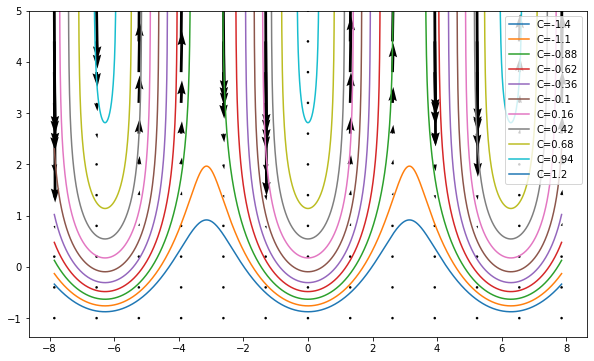

In [48]:
U = np.ones_like(X)
ax.quiver(X, Y, U, V, angles='xy')
fig

Hier ist es besser, die Pfeile zu normieren.  

In [49]:
nv = np.sqrt(1+V**2)
V /= nv
U /= nv

<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))
<lambdifygenerated-8>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(C1 - cos(x)))


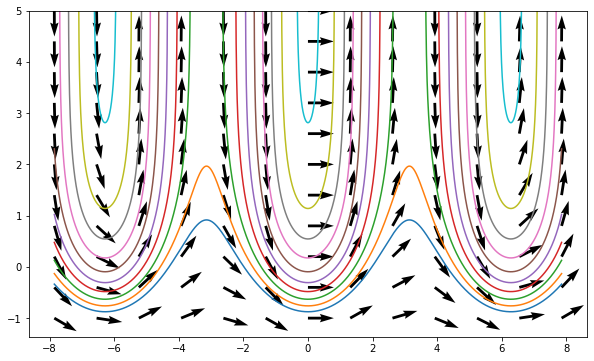

In [50]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
for C in np.linspace(-1.4, 1.2, 11):
    ax.plot(xn, phi_n(xn, C))
ax.axis(ymax=5)
ax.quiver(X, Y, U, V, angles='xy');

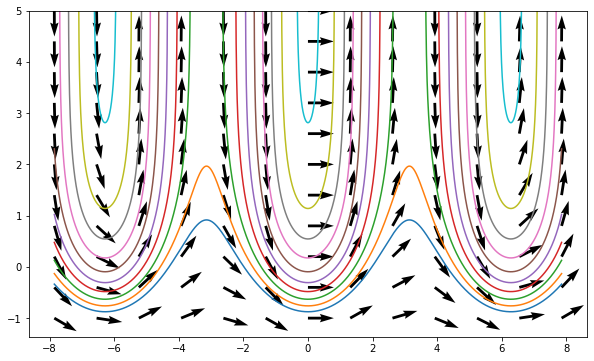

In [51]:
fig

# Definitionsbereiche

Für welche $y_0$ is die Lösung der Anfangsbedingung $y(0)=y_0$ auf ganz $\mathbb R$ definiert?

In [52]:
y0 = S('y0')
ics = {y(0): y0}

In [53]:
lsg = dsolve(dgl, ics=ics)
lsg

In [54]:
lsg = lsg.expand()
lsg

Dazu muss der Nenner immer negativ sein

In [55]:
lsg.rhs.args

In [56]:
b = lsg.rhs.args[0].subs(x, pi)
b

In [57]:
I1 = solveset(b > 0, domain=Reals)
I1

In [58]:
phi = lsg.rhs.subs(y0, I1.end)
phi

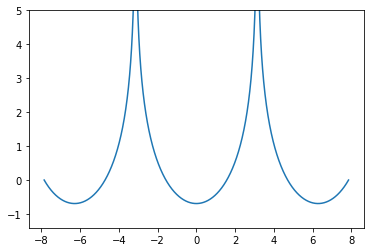

In [59]:
phi_n = lambdify(x, phi)
plt.plot(xn, phi_n(xn))
plt.axis(ymax=5);